In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("hotel_bookings_clean.csv" )
df.drop('Unnamed: 0',axis = 1,inplace =  True)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'month',
       'day'],
      dtype='object')

In [8]:
abs(df.corr()["is_canceled"]).sort_values(ascending = False)[1:]

lead_time                         0.291602
total_of_special_requests         0.235923
required_car_parking_spaces       0.195012
booking_changes                   0.145136
year                              0.117552
previous_cancellations            0.109909
is_repeated_guest                 0.084141
agent                             0.077208
month                             0.069259
adults                            0.056130
previous_bookings_not_canceled    0.055502
days_in_waiting_list              0.054113
adr                               0.044885
day                               0.034031
babies                            0.032605
stays_in_week_nights              0.024803
arrival_date_year                 0.016408
arrival_date_week_number          0.007664
arrival_date_day_of_month         0.006002
children                          0.004535
stays_in_weekend_nights           0.002223
Name: is_canceled, dtype: float64

**From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.
year is also co-related but for prediction purpose we cant us this one**

by the domain knowledge we know that these column should be excluded 

*'days_in_waiting_list','arrival_date_year','year','month','day'*

In [12]:
num_not=['days_in_waiting_list','arrival_date_year']
num_features = [col for col in df.columns if df[col].dtype != 'object' and col not in num_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'year',
 'month',
 'day']

by the domain knowledge i am removing these col for cat feature

*'arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country','days_in_waiting_list' , 'reservation_status_date'*

In [13]:
cat_not=['arrival_date_year', 'assigned_room_type', 'booking_changes', 
         'reservation_status', 'reservation_status_date' , 'country','days_in_waiting_list']
cat_features = [col for col in df.columns if df[col].dtype == 'object' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

## Feature Encoding
**Applying Mean Encoding**

In [14]:
cat = df[cat_features]

In [15]:
cat['classification'] = df["is_canceled"]

<ipython-input-15-2e1820cf5683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['classification'] = df["is_canceled"]


In [16]:
for col in cat_features:
    print(cat.groupby([col])['classification'].mean().to_dict())

{'City Hotel': 0.4177375131091821, 'Resort Hotel': 0.27982821775925226}
{'April': 0.40858851241166877, 'August': 0.37814397224631396, 'December': 0.35216095380029805, 'February': 0.336751281730649, 'January': 0.3077054210705762, 'July': 0.3751486797240504, 'June': 0.4152239626270954, 'March': 0.3239987645423659, 'May': 0.39743371855880355, 'November': 0.31496062992125984, 'October': 0.3815195813030139, 'September': 0.3919112725882016}
{'BB': 0.37529551471309197, 'FB': 0.5989974937343359, 'HB': 0.3451382632199044, 'SC': 0.3741348250687399, 'Undefined': 0.24549356223175967}
{'Aviation': 0.22127659574468084, 'Complementary': 0.12258953168044077, 'Corporate': 0.19180231417925084, 'Direct': 0.15453960077269802, 'Groups': 0.6112402708986152, 'Offline TA/TO': 0.342839378238342, 'Online TA': 0.36806134947544067}
{'Corporate': 0.22466007416563658, 'Direct': 0.17591695501730104, 'GDS': 0.19170984455958548, 'TA/TO': 0.4108613695037495, 'Undefined': 0.0}
{'A': 0.3927702386523163, 'B': 0.3267326732

In [17]:
for col in cat_features:
    dict = cat.groupby([col])['classification'].mean().to_dict()
    cat[col]=cat[col].map(dict)

<ipython-input-17-15d8e8fb23d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[col]=cat[col].map(dict)


for understanding map function 

click here
<!--
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s.map({'cat': 'kitten', 'dog': 'puppy'})
ouput = kitten ,puppy

-->

In [18]:
cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,classification
0,0.279828,0.375149,0.375296,0.154540,0.175917,0.331183,0.284846,0.409328,0
1,0.279828,0.375149,0.375296,0.154540,0.175917,0.331183,0.284846,0.409328,0
2,0.279828,0.375149,0.375296,0.154540,0.175917,0.392770,0.284846,0.409328,0
3,0.279828,0.375149,0.375296,0.191802,0.224660,0.392770,0.284846,0.409328,0
4,0.279828,0.375149,0.375296,0.368061,0.410861,0.392770,0.284846,0.409328,0
...,...,...,...,...,...,...,...,...,...
118723,0.417738,0.378144,0.375296,0.342839,0.410861,0.392770,0.284846,0.409328,0
118724,0.417738,0.378144,0.375296,0.368061,0.410861,0.293628,0.284846,0.409328,0
118725,0.417738,0.378144,0.375296,0.368061,0.410861,0.318521,0.284846,0.409328,0
118726,0.417738,0.378144,0.375296,0.368061,0.410861,0.392770,0.284846,0.409328,0


In [19]:
dataframe=pd.concat([cat,df[num_features]],axis=1)

In [20]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,classification,is_canceled,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,0.279828,0.375149,0.375296,0.154540,0.175917,0.331183,0.284846,0.409328,0,0,...,0,0,3,86.545532,0.0,0,0,2015,7,1
1,0.279828,0.375149,0.375296,0.154540,0.175917,0.331183,0.284846,0.409328,0,0,...,0,0,4,86.545532,0.0,0,0,2015,7,1
2,0.279828,0.375149,0.375296,0.154540,0.175917,0.392770,0.284846,0.409328,0,0,...,0,0,0,86.545532,75.0,0,0,2015,7,2
3,0.279828,0.375149,0.375296,0.191802,0.224660,0.392770,0.284846,0.409328,0,0,...,0,0,0,304.000000,75.0,0,0,2015,7,2
4,0.279828,0.375149,0.375296,0.368061,0.410861,0.392770,0.284846,0.409328,0,0,...,0,0,0,240.000000,98.0,0,1,2015,7,3


**classification and is_canceled is same so we will drop one**

In [21]:
dataframe.drop("classification",axis = 1,inplace = True)

In [22]:
dataframe.shape

(118728, 28)

## Handle Outliers

<AxesSubplot:ylabel='lead_time'>

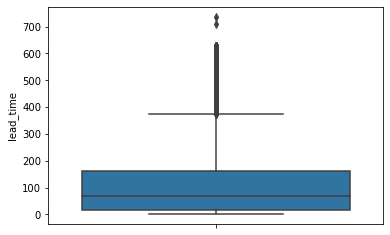

In [25]:
sns.boxplot(y = "lead_time" , data = dataframe)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


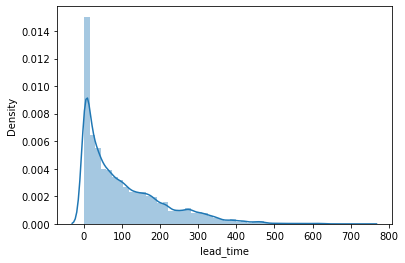

In [28]:
sns.distplot(dataframe["lead_time"])
plt.show()

In [30]:
q1 = dataframe["lead_time"].quantile(0.25)
q3 = dataframe["lead_time"].quantile(0.75)
iqr = q3 - q1

In [34]:
lower_lim = q1 - 1.5*iqr 
upper_lim = q3 + 1.5*iqr

In [35]:
len(dataframe)

118728

In [37]:
newdf = dataframe[(dataframe["lead_time"] > lower_lim) & (dataframe["lead_time"] < upper_lim) ]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


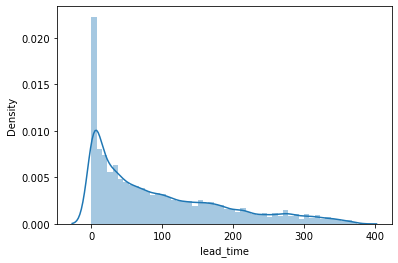

In [38]:
sns.distplot(newdf["lead_time"])
plt.show()

In [40]:
len(newdf)

115747

In [44]:
dataframe.to_csv("final_df.csv")